### Problem :-  Student Attendance Dashboard for Decision Making. You will be given Google Sheet with different sheet holding data of different classes. Create a dashboard showing summary of what's happening across different classes. Which students needs attention for missing session? Which students are unsatisfied? Which students are very satisfied?
### Data Link :- https://docs.google.com/spreadsheets/d/1Y_g6LQI2GLqpKf-fj-rH7D9gfnP2MJzpFA6t0AsBMi8/edit?usp=sharing

In [6]:
import numpy as np
import pandas as pd
import plotly.express as px

In [ ]:
# Class 1 Processing

In [14]:
sheet_id = '1Y_g6LQI2GLqpKf-fj-rH7D9gfnP2MJzpFA6t0AsBMi8'
class1 = pd.read_csv(f"https://docs.google.com/spreadsheets/d/{sheet_id}/export?format=csv")
class1.head()

,Student Roll Num,Type,10-01-21,R-10-01-21,09-01-21,R-9-01-21,08-01-21,R-8-01-21,07-01-21,R-7-01-21,...,05-01-21,R-5-01-21,04-01-21,R-4-01-21,03-01-21,R-3-01-21,02-01-21,R-02-01-21,01-01-21,R-01-01-21
0,1,WORKING,Missed,9,Missed,8,Missed,5,Missed,8,...,Missed,5,Missed,8,Missed,8,Missed,9,Missed,7
1,2,NaN,Missed,5,Missed,10,Missed,10,Attended,10,...,Attended,8,Attended,7,Missed,9,Attended,10,Missed,10
2,3,STUDENT,Missed,5,Missed,8,Missed,7,Missed,10,...,Attended,7,Missed,10,Missed,6,Attended,9,Attended,7
3,4,STUDENT,Missed,8,Missed,9,Attended,8,Missed,8,...,Missed,9,Attended,9,Attended,7,Attended,10,Attended,7
4,5,WORKING,Missed,6,Missed,9,Missed,5,Missed,8,...,Missed,6,Missed,8,Missed,8,Missed,9,Missed,5


In [15]:
class1.head()

,Student Roll Num,Type,10-01-21,R-10-01-21,09-01-21,R-9-01-21,08-01-21,R-8-01-21,07-01-21,R-7-01-21,...,05-01-21,R-5-01-21,04-01-21,R-4-01-21,03-01-21,R-3-01-21,02-01-21,R-02-01-21,01-01-21,R-01-01-21
0,1,WORKING,Missed,9,Missed,8,Missed,5,Missed,8,...,Missed,5,Missed,8,Missed,8,Missed,9,Missed,7
1,2,NaN,Missed,5,Missed,10,Missed,10,Attended,10,...,Attended,8,Attended,7,Missed,9,Attended,10,Missed,10
2,3,STUDENT,Missed,5,Missed,8,Missed,7,Missed,10,...,Attended,7,Missed,10,Missed,6,Attended,9,Attended,7
3,4,STUDENT,Missed,8,Missed,9,Attended,8,Missed,8,...,Missed,9,Attended,9,Attended,7,Attended,10,Attended,7
4,5,WORKING,Missed,6,Missed,9,Missed,5,Missed,8,...,Missed,6,Missed,8,Missed,8,Missed,9,Missed,5


In [21]:
# Dealing with missing value
def cleaning(data):
    for i in data.columns[2:]:
        if data[i].isnull().sum() == data.shape[0]:
            del data[i]
    data["Type"].fillna('STUDENT',inplace=True)
    b = "Missed"
    for i in data.columns[2:]:
        a = data[i].mode()
        if data[i].isnull().sum().any() and (i[0]=="R"):
            data[i].fillna(a,inplace=True)
        else:
            data[i].fillna(b,inplace=True)
    return data

In [22]:
class1 = cleaning(class1)
class1.isnull().sum().any()

False

In [26]:
# Class 2 preprocessing
sheet_id = '1Y_g6LQI2GLqpKf-fj-rH7D9gfnP2MJzpFA6t0AsBMi8'
class2 = pd.read_csv(f"https://docs.google.com/spreadsheets/d/{sheet_id}/export?format=csv&gid=1548342679")
class2.head()

,Student Roll Num,Type,10-01-21,R-10-01-21,09-01-21,R-9-01-21,08-01-21,R-8-01-21,07-01-21,R-7-01-21,...,05-01-21,R-5-01-21,04-01-21,R-4-01-21,03-01-21,R-3-01-21,Unnamed: 18,Unnamed: 19,01-01-21,R-01-01-21
0,1,NaN,Attended,5,Attended,8,Attended,9,Attended,7,...,Attended,7,Attended,10,Missed,10,NaN,NaN,NaN,NaN
1,2,NaN,Attended,9,Attended,7,Attended,6,Attended,9,...,Attended,6,Attended,6,Attended,6,NaN,NaN,NaN,NaN
2,3,STUDENT,Missed,8,Missed,6,Missed,5,Missed,5,...,Missed,10,Missed,7,Missed,5,NaN,NaN,NaN,NaN
3,4,NaN,Attended,10,Attended,9,Attended,5,Attended,10,...,Missed,6,Attended,9,Attended,10,NaN,NaN,NaN,NaN
4,5,WORKING,Attended,7,Attended,9,Attended,10,Missed,10,...,Missed,10,Missed,5,Missed,9,NaN,NaN,NaN,NaN


In [27]:
class2.isnull().sum()

Student Roll Num     0
Type                40
10-01-21             0
R-10-01-21           0
09-01-21             0
R-9-01-21            0
08-01-21             0
R-8-01-21            0
07-01-21             1
R-7-01-21            0
06-01-21             1
R-6-01-21            0
05-01-21             1
R-5-01-21            0
04-01-21             1
R-4-01-21            0
03-01-21             3
R-3-01-21            0
Unnamed: 18         70
Unnamed: 19         70
01-01-21            70
R-01-01-21          70
dtype: int64

In [28]:
class2 = cleaning(class2)
class2.isnull().sum().any()

False

In [29]:
class2.isnull().sum()

Student Roll Num    0
Type                0
10-01-21            0
R-10-01-21          0
09-01-21            0
R-9-01-21           0
08-01-21            0
R-8-01-21           0
07-01-21            0
R-7-01-21           0
06-01-21            0
R-6-01-21           0
05-01-21            0
R-5-01-21           0
04-01-21            0
R-4-01-21           0
03-01-21            0
R-3-01-21           0
dtype: int64

Traineer type for class1


<AxesSubplot:xlabel='Type', ylabel='Numbers of trainees'>

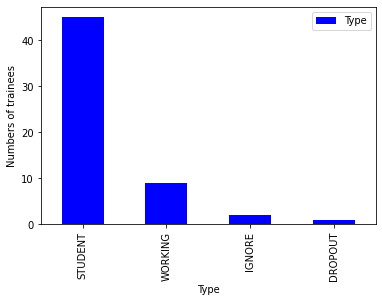

In [38]:
# Insight for class1 and class2
print('Traineer type for class1')
a = class1["Type"].value_counts().plot(kind = "bar",color = 'blue', legend= True)
a.set_xlabel("Type")
a.set_ylabel("Numbers of trainees")
a

Traineer type for class2


<AxesSubplot:xlabel='Type', ylabel='Numbers of trainees'>

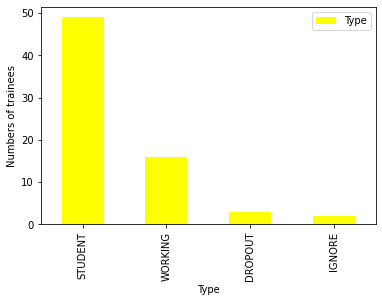

In [41]:
print('Traineer type for class2')
b = class2["Type"].value_counts().plot(kind = "bar",color = 'yellow', legend= True)
b.set_xlabel("Type")
b.set_ylabel("Numbers of trainees")
b

In [45]:
def kpi1(df):
    c = 0
    s= df.shape[0]
    lis1 = []
    for i in df.columns[2:]:
        ss = 0
        if i[0]!="R":
            c += 1
            values = df[i].value_counts(dropna=False).keys().tolist()
            counts = df[i].value_counts(dropna=False).tolist()
            dd = dict(zip(values, counts))
            lis1.append(dd["Attended"])
            
    print("Number of Trainees attend the class on daily basis:")
    print(sum(lis1)//c)
    print("Which is equal to ""{:.2f}".format(((sum(lis1)//c)/s)*100),"% of total no of trainees")

In [46]:
kpi1(class1)

Number of Trainees attend the class on daily basis:
28
Which is equal to 49.12 % of total no of trainees


In [47]:
kpi1(class2)

Number of Trainees attend the class on daily basis:
40
Which is equal to 57.14 % of total no of trainees


In [48]:
def kpi2(df):
    c = 0
    s= df.shape[0]
    lis1 = []
    for i in df.columns[2:]:
        ss = 0
        if i[0]=="R":
            c += 1
            ss = sum(df[i])/s
            lis1.append(ss)
    print("Average rating of class:")
    print("{:.1f}".format(sum(lis1)/c))

In [49]:
kpi2(class1)

Average rating of class:
7.5


In [51]:
kpi2(class2)

Average rating of class:
7.5


In [55]:
def student_info(df):

    ratings_features = list(range(3,len(df.columns)+1,2))

    class_students = pd.DataFrame({'student_roll_num':df['Student Roll Num'],
                                   'student_type':df['Type'],
                                   'classes_attended':df[df == 'Attended'].count(axis = 1),
                                  'num_of_classes':df[(df == 'Missed')|(df == 'Attended')].count(axis = 1),
                                   'average_rating':df.iloc[:,ratings_features].mean(axis = 1)}).sort_values(by = 'classes_attended')

    class_students['attendance_perc'] = (class_students['classes_attended']/class_students['num_of_classes'])*100
    return class_students

In [56]:
class1_students = student_info(class1)
class2_students = student_info(class2)

In [ ]:
#Which students need are missing the most classes?

In [59]:
# For class 1
fig = px.bar(class1_students, x='student_roll_num', y='classes_attended')
fig.update_layout(uniformtext_minsize=8, uniformtext_mode='hide', title={
        'text': "Roll No wise Attendance Distribution for Batch 1",
        'y':1,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'},
        xaxis_title="Students Roll Number",
        yaxis_title="Number of Classes Attended",)
fig.show()

In [60]:
# for class 2
fig = px.bar(class2_students, x='student_roll_num', y='classes_attended')
fig.update_layout(uniformtext_minsize=8, uniformtext_mode='hide', title={
        'text': "Roll No wise Attendance Distribution for Batch 2",
        'y':0.95,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'},
        xaxis_title="Students Roll Number",
        yaxis_title="Number of Classes Attended",)
fig.show()


In [61]:
 # Which students are most satisfied and least satisfied?

In [65]:
# for class 1
fig = px.bar(class1_students, x='student_roll_num', y='average_rating')
fig.update_layout(uniformtext_minsize=8, uniformtext_mode='hide', title={
        'text': "Roll No wise Average Rating for Class 1",
        'y':0.98,
        'x':0.6,
        'xanchor': 'center',
        'yanchor': 'top'},
        xaxis_title="Students Roll Number",
        yaxis_title="Average Rating")
fig.show()

In [70]:
# for class 2
fig = px.bar(class2_students, x='student_roll_num', y='average_rating')
fig.update_layout(uniformtext_minsize=8, uniformtext_mode='hide', title={
        'text': "Roll No wise Average Rating for Class 2",
        'y':0.98,
        'x':0.6,
        'xanchor': 'center',
        'yanchor': 'top'},
        xaxis_title="Students Roll Number",
        yaxis_title="Average Rating")
fig.show()

In [71]:
# Students missing more number of classes or are working people missing more classes?

In [72]:
a_1=class1_students.groupby('student_type', as_index = False).mean()
a_2=class2_students.groupby('student_type', as_index = False).mean()

In [78]:
# for class 1

fig = px.bar(a_1, x='student_type', y='attendance_perc')
fig.update_layout(uniformtext_minsize=8, uniformtext_mode='hide', title={
        'text': "Student Type vs Attendace Percentage - Class 1",
        'y':0.96,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'},
        xaxis_title="Type Of Students",
        yaxis_title="Attendences Percentage",)
fig.show()

In [80]:
# for class 2
fig = px.bar(a_2, x='student_type', y='attendance_perc')
fig.update_layout(uniformtext_minsize=8, uniformtext_mode='hide', title={
        'text': "Student Type vs Attendace Percentage - Class 2",
        'y':0.95,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'},
        xaxis_title="Type Of Students",
        yaxis_title="Attendences Percentage",)
fig.show()

In [81]:
# How is the average rating trending for different batches?

In [83]:
c1 = class1.groupby("Type").mean()
a=c1.iloc[:,2:].T

In [84]:
fiaa = class2.groupby("Type").mean()
a=aa.iloc[:,2:].T


fig = px.line(a, y=a.columns)
fig.update_layout(uniformtext_minsize=8, uniformtext_mode='hide', title={
        'text': "Avg rating given by Different type of students",
        'y':0.95,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'},
        xaxis_title="Date",
        yaxis_title="Average Rating",)
fig.show()

In [85]:
# What is the rating trend for students who are missing classes vs students who are attending classes?

In [88]:
# for class 1

def date_ratings(df):
    df_mod = pd.DataFrame(df.drop('Student Roll Num', axis = 1).mean(axis = 0)).reset_index(drop = False)
    df_mod.columns = ['date','average_rating']
    df_mod['date'] = df_mod['date'].str.replace('R-','')
    df_mod['date'] = pd.to_datetime(df_mod['date'],dayfirst = True)
    return df_mod

class1_dates = date_ratings(class1)
class2_dates = date_ratings(class2)

In [91]:
fig = px.line(class1_dates, x='date', y="average_rating")
fig.update_layout(uniformtext_minsize=8, uniformtext_mode='hide', title={
        'text': "Average Rating Trend for Class 1",
        'y':0.95,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'},
        xaxis_title="Date",
        yaxis_title="Average Rating",)
fig.show()

In [93]:
def date_ratings_missers(df_students, full_df):
    students_missing_class = df_students[:15]
    df = students_missing_class.merge(full_df, left_on = 'student_roll_num',right_on = 'Student Roll Num', how = 'left')
    df_mod = pd.DataFrame(df.drop(['student_roll_num','num_of_classes','classes_attended','average_rating','attendance_perc','Student Roll Num'], axis = 1).mean(axis = 0)).reset_index(drop = False)
    df_mod.columns = ['date','average_rating']
    df_mod['date'] = df_mod['date'].str.replace('R-','')
    df_mod['date'] = pd.to_datetime(df_mod['date'],dayfirst = True)
    return df_mod

class1_missers = date_ratings_missers(class1_students, class1)

In [94]:
fig = px.line(class1_missers, x='date', y="average_rating")
fig.update_layout(uniformtext_minsize=8, uniformtext_mode='hide', title={
        'text': "Average Rating Trend for Class 1 (People with low attendance)",
        'y':0.95,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'},
        xaxis_title="Date",
        yaxis_title="Average Rating",)
fig.show()

In [96]:
def date_ratings_highattendance(df_students, full_df):
    students_missing_class = df_students[-15:]
    df = students_missing_class.merge(full_df, left_on = 'student_roll_num',right_on = 'Student Roll Num', how = 'left')
    df_mod = pd.DataFrame(df.drop(['student_roll_num','num_of_classes','classes_attended','average_rating','attendance_perc','Student Roll Num'], axis = 1).mean(axis = 0)).reset_index(drop = False)
    df_mod.columns = ['date','average_rating']
    df_mod['date'] = df_mod['date'].str.replace('R-','')
    df_mod['date'] = pd.to_datetime(df_mod['date'],dayfirst = True)
    return df_mod
class1_highattendance = date_ratings_highattendance(class1_students,class1)

fig = px.line(class1_highattendance, x='date', y="average_rating")
fig.update_layout(uniformtext_minsize=8, uniformtext_mode='hide', title={
        'text': "Average Rating Trend for Class 1 (People with high attendance)",
        'y':0.95,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'},
        xaxis_title="Date",
        yaxis_title="Average Rating",)
fig.show()

In [97]:
# for class 2

fig = px.line(class2_dates, x='date', y="average_rating")
fig.update_layout(uniformtext_minsize=8, uniformtext_mode='hide', title={
        'text': "Average Rating Trend - Class 2",
        'y':0.95,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'},
        xaxis_title="Date",
        yaxis_title="Average Rating",)
fig.show()

In [98]:
def plot_rating_over_time():
    class2_missers = date_ratings_missers(class2_students, class2)
    plot_rating_over_time(class2_missers, 'Class 2 (People with low attendance)')
    class2_highattendance = date_ratings_highattendance(class2_students,class2)
    plot_rating_over_time(class2_highattendance, 'Class 2 (People with high attendance)')

In [101]:
def plot_rating_over_time(df, name):
    fig = px.line(df, x='date', y="average_rating")
    fig.update_layout(uniformtext_minsize=8, uniformtext_mode='hide', title={
        'text': "Average Rating Trend for {0}".format(name),
        'y':0.95,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'},
        xaxis_title="Date",
        yaxis_title="Average Rating",)
    fig.show()
class2_missers = date_ratings_missers(class2_students, class2)
plot_rating_over_time(class2_missers, 'Class 2 (People with low attendance)')

In [103]:
class2_highattendance = date_ratings_highattendance(class2_students,class2)
plot_rating_over_time(class2_highattendance, 'Class 2 (People with high attendance)')